##Exercise 0


a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

In [2]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")

df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,121.0,2011.545455,2.915476,2007.0,2009.0,2012.0,2014.0,2017.0
Month,121.0,6.454545,3.488075,1.0,3.0,6.0,9.0,12.0
Quantity,121.0,11134.297521,1752.046397,5353.0,10250.0,11385.0,12337.0,14207.0
Quantity_YoY,121.0,392.586777,1789.539953,-4548.0,-526.0,493.0,1445.0,5227.0
Import,121.0,2204.371901,573.127896,1048.0,1812.0,2263.0,2625.0,3768.0
Import_YoY,121.0,-135.049587,545.395787,-1810.0,-495.0,-114.0,162.0,1334.0
Used,61.0,36864.737705,4230.548664,24106.0,34212.0,37079.0,39797.0,44106.0
Used_YoY,49.0,973.122449,2728.915662,-6261.0,-392.0,855.0,2708.0,5896.0
Avg_CO2,121.0,129.520661,22.719338,84.0,110.0,132.0,151.0,162.0
Bensin_Co2,121.0,133.735537,17.094233,94.0,120.0,131.0,150.0,165.0


In [4]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

In [5]:
df.dtypes

Year                   int64
Month                  int64
Quantity               int64
Quantity_YoY           int64
Import                 int64
Import_YoY             int64
Used                 float64
Used_YoY             float64
Avg_CO2                int64
Bensin_Co2             int64
Diesel_Co2             int64
Quantity_Diesel        int64
Diesel_Share         float64
Diesel_Share_LY      float64
Quantity_Hybrid      float64
Quantity_Electric    float64
Import_Electric      float64
dtype: object

 b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

In [6]:
import duckdb

df_quantitiy_year = duckdb.query("""
    SELECT 
    year, 
    SUM(quantity) as Quantity
    FROM df
    GROUP BY
        Year
    ORDER BY
        Quantity
    ASC   
""").df()
df_quantitiy_year



,Year,Quantity
0,2017,13055.0
1,2009,98675.0
2,2008,110617.0
3,2010,127754.0
4,2007,129195.0
5,2012,137967.0
6,2011,138345.0
7,2013,142151.0
8,2014,144202.0
9,2015,150686.0


<Axes: xlabel='Year'>

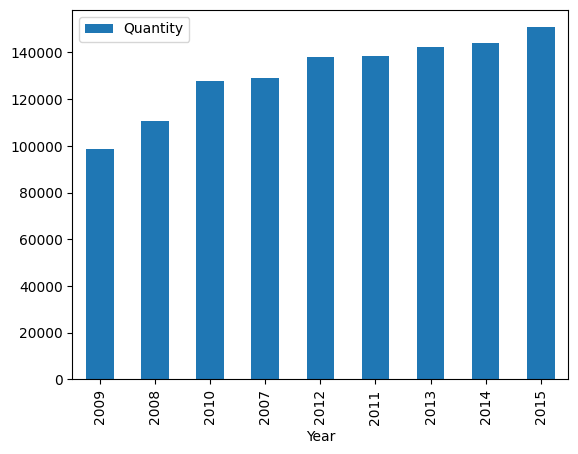

In [7]:
df_quantitiy_year.iloc[1:10].plot(kind= "bar", x = "Year", y = "Quantity")

# Excluded the year 2017 with abnormal data

c)  Draw a line chart of average CO2 emissions for same years that as in b)

In [8]:
df_emissions_year = duckdb.query("""
    SELECT 
    Year, 
    SUM(Avg_CO2) as Emissions
    FROM df
    GROUP BY
        Year
    ORDER BY
        Emissions
    ASC   
""").df()
df_emissions_year

,Year,Emissions
0,2017,84.0
1,2016,1120.0
2,2015,1197.0
3,2014,1325.0
4,2013,1476.0
5,2012,1559.0
6,2011,1608.0
7,2010,1688.0
8,2009,1811.0
9,2008,1896.0


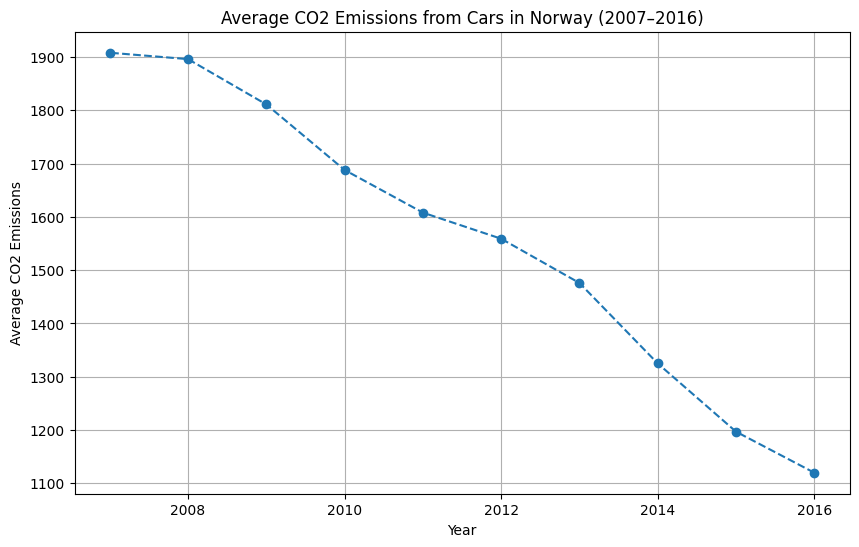

In [11]:
import matplotlib.pyplot as plt

df_emissions_year2 = df_emissions_year[df_emissions_year["Year"] != 2017]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_emissions_year2["Year"], df_emissions_year2["Emissions"], marker='o', linestyle='--') # marker for dots, linestyle for spaces in line

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average CO2 Emissions")
plt.title("Average CO2 Emissions from Cars in Norway (2007–2016)")
plt.grid(True)
plt.show()


In [16]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

d) Draw a line chart of all years and months for import

Years

In [25]:
df_imports_year = duckdb.query("""
    SELECT 
    Year, 
    SUM(Import) as Imports
    FROM df
    GROUP BY
        Year
    ORDER BY
        Year
    ASC   
""").df()
df_imports_year

,Year,Imports
0,2007,33356.0
1,2008,27218.0
2,2009,24823.0
3,2010,29014.0
4,2011,27069.0
5,2012,30556.0
6,2013,30312.0
7,2014,24757.0
8,2015,21756.0
9,2016,16319.0


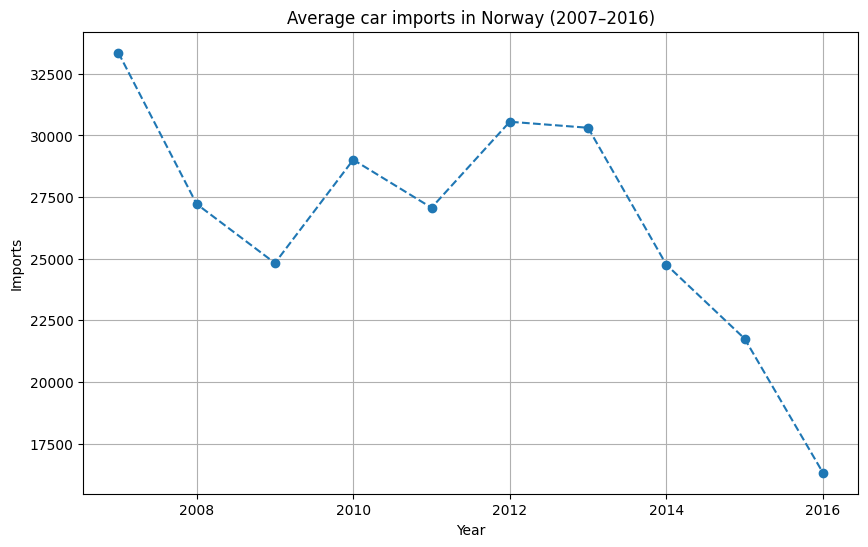

In [ ]:
df_imports_year2 = df_imports_year[df_imports_year["Year"] != 2017]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_imports_year2["Year"], df_imports_year2["Imports"], marker='o', linestyle='--') # marker for dots, linestyle for spaces in line

# Labels and title
plt.xlabel("Year")
plt.ylabel("Imports")
plt.title("Car imports in Norway (2007–2016)")
plt.grid(True)
plt.show()

Months

In [56]:
df_imports_month = duckdb.query("""
    SELECT 
    Month,
    Year, 
    SUM(Import) as Imports
    FROM df
    GROUP BY
        Year, Month
    ORDER BY
        Month
    ASC   
""").df()
df_imports_month

,Month,Year,Imports
0,1,2007,2276.0
1,1,2008,2287.0
2,1,2009,1048.0
3,1,2010,1715.0
4,1,2013,2525.0
...,...,...,...
116,12,2008,1061.0
117,12,2009,2395.0
118,12,2010,1755.0
119,12,2013,1361.0


In [74]:
df_combined = df_imports_month[df_imports_month["Year"] != 2017]

df_combined



,Month,Year,Imports
0,1,2007,2276.0
1,1,2008,2287.0
2,1,2009,1048.0
3,1,2010,1715.0
4,1,2013,2525.0
...,...,...,...
116,12,2008,1061.0
117,12,2009,2395.0
118,12,2010,1755.0
119,12,2013,1361.0


In [67]:
df_combined.describe()

,Month,Year,Imports
count,120.000000,120.000000,120.000000
mean,6.500000,2011.500000,2209.833333
std,3.466527,2.884324,572.360428
min,1.000000,2007.000000,1048.000000
25%,3.750000,2009.000000,1827.750000
50%,6.500000,2011.500000,2266.500000
75%,9.250000,2014.000000,2625.250000
max,12.000000,2016.000000,3768.000000


In [59]:
df_combined = df.fillna("0")

In [134]:
df_month_make = duckdb.query(
    """--sql
            SELECT year || '-' || LPAD(CAST(month as varchar),2, '0') AS date,
                    SUM(Import) as Imports FROM df
            GROUP BY year, month
            ORDER BY year, month  
    """
).df()

# df_month_make

df_month_make["date"] = pd.to_datetime(df_month_make["date"], format="%Y-%m")
# df_month_make_pivot = df_month_make.pivot(index='date', columns='Imports', values='Imports').fillna(0)

df_month_make

,date,Imports
0,2007-01-01,2276.0
1,2007-02-01,1992.0
2,2007-03-01,2626.0
3,2007-04-01,2220.0
4,2007-05-01,2881.0
...,...,...
116,2016-09-01,1526.0
117,2016-10-01,1365.0
118,2016-11-01,1305.0
119,2016-12-01,1137.0


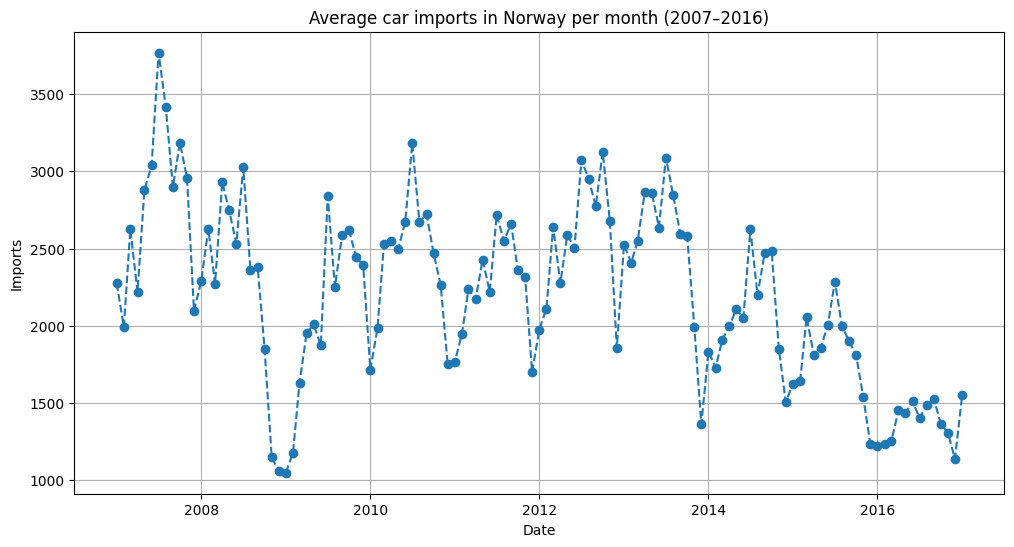

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_month_make["date"], df_month_make["Imports"], marker='o', linestyle='--') # marker for dots, linestyle for spaces in line

# Labels and title
plt.xlabel("Date")
plt.ylabel("Imports")
plt.title("Car imports in Norway per month (2007–2016)")
plt.grid(True)
plt.show()


<Figure size 2200x600 with 0 Axes>

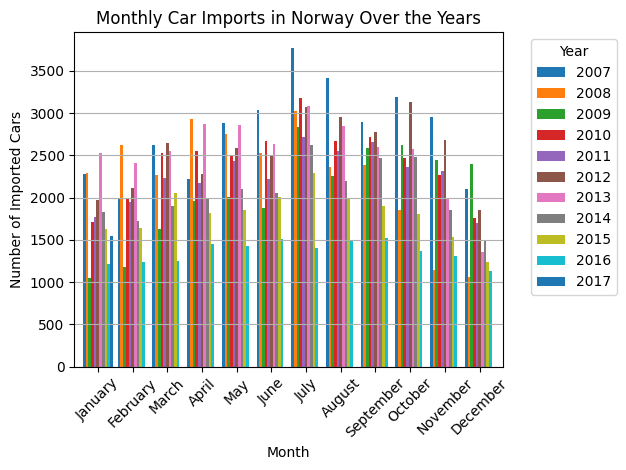

In [143]:
import matplotlib.pyplot as plt
import calendar

# Pivot the data
pivot_df = df.pivot(index='Month', columns='Year', values='Import')

# Replace month numbers (1–12) with month names
pivot_df.index = [calendar.month_name[m] for m in pivot_df.index]

# Plotting
plt.figure(figsize=(22, 6))
pivot_df.plot(kind='bar', width=0.85)

# Customize the plot
plt.title('Monthly Car Imports in Norway Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Imported Cars')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate month names slightly for readability
plt.tight_layout()
plt.grid(True, axis='y')

# Show plot
plt.show()



e) Draw a line chart of all years and months for average CO2 emissions

In [157]:
pivot_df_emissions

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
January,152.0,158.0,152.0,137.0,135.0,135.0,128.0,117.0,101.0,96.0
February,156.0,160.0,154.0,144.0,137.0,130.0,128.0,112.0,102.0,95.0
March,159.0,159.0,154.0,144.0,136.0,131.0,128.0,101.0,93.0,88.0
April,160.0,159.0,153.0,142.0,136.0,130.0,127.0,114.0,102.0,93.0
May,160.0,157.0,151.0,141.0,134.0,129.0,127.0,113.0,99.0,96.0
June,161.0,158.0,153.0,142.0,135.0,131.0,127.0,110.0,96.0,96.0
July,159.0,157.0,150.0,140.0,134.0,132.0,127.0,111.0,102.0,98.0
August,160.0,157.0,147.0,138.0,132.0,127.0,120.0,107.0,100.0,93.0
September,160.0,157.0,145.0,138.0,132.0,125.0,118.0,110.0,100.0,88.0
October,159.0,158.0,146.0,138.0,132.0,127.0,118.0,110.0,99.0,91.0


In [136]:
df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


<Figure size 2600x600 with 0 Axes>

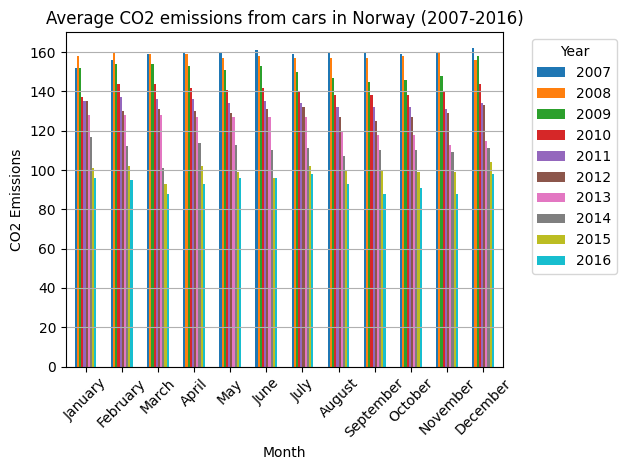

In [164]:



# Pivot the data
pivot_df_emissions = df.pivot(index='Month', columns='Year', values='Avg_CO2')
pivot_df_emissions = pivot_df_emissions.drop(columns=2017)
pivot_df_emissions



# pivot_df_emissions.fillna("0")

#Replace month numbers (1–12) with month names
pivot_df_emissions.index = [calendar.month_name[m] for m in pivot_df_emissions.index]

# Plotting
plt.figure(figsize=(26, 6))
pivot_df_emissions.plot(kind='bar', width=0.6)

# Customize the plot
plt.title('Average CO2 emissions from cars in Norway (2007-2016)')
plt.xlabel('Month')
plt.ylabel('CO2 Emissions')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate month names slightly for readability
plt.tight_layout()
plt.grid(True, axis='y')

# Show plot
plt.show()

In [176]:
pivot_df_emissions

Year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
January,152.0,158.0,152.0,137.0,135.0,135.0,128.0,117.0,101.0,96.0
February,156.0,160.0,154.0,144.0,137.0,130.0,128.0,112.0,102.0,95.0
March,159.0,159.0,154.0,144.0,136.0,131.0,128.0,101.0,93.0,88.0
April,160.0,159.0,153.0,142.0,136.0,130.0,127.0,114.0,102.0,93.0
May,160.0,157.0,151.0,141.0,134.0,129.0,127.0,113.0,99.0,96.0
June,161.0,158.0,153.0,142.0,135.0,131.0,127.0,110.0,96.0,96.0
July,159.0,157.0,150.0,140.0,134.0,132.0,127.0,111.0,102.0,98.0
August,160.0,157.0,147.0,138.0,132.0,127.0,120.0,107.0,100.0,93.0
September,160.0,157.0,145.0,138.0,132.0,125.0,118.0,110.0,100.0,88.0
October,159.0,158.0,146.0,138.0,132.0,127.0,118.0,110.0,99.0,91.0


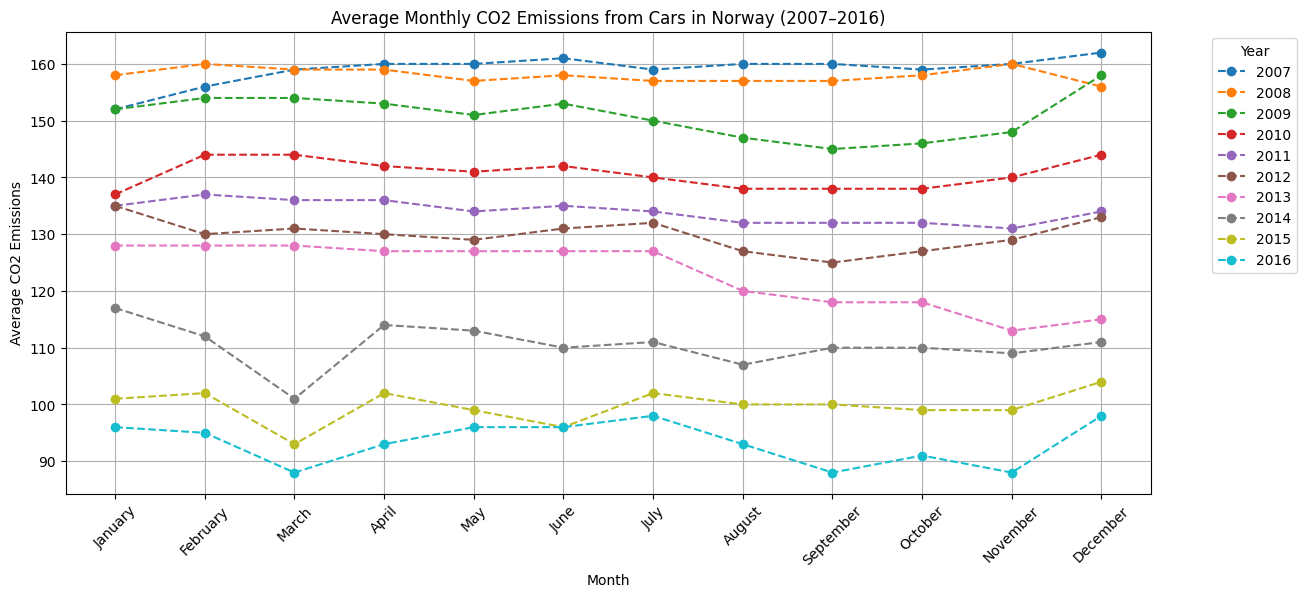

In [175]:
import matplotlib.pyplot as plt
import calendar

# Only convert if index contains numbers (e.g. 1 to 12)
if isinstance(pivot_df_emissions.index[0], int):
    pivot_df_emissions.index = [calendar.month_name[m] for m in pivot_df_emissions.index]

# Ensure months are sorted from January to December
month_order = list(calendar.month_name)[1:]  # Skip the empty string at index 0
pivot_df_emissions = pivot_df_emissions.reindex(month_order)

# Line plot
plt.figure(figsize=(14, 6))

for year in pivot_df_emissions.columns:
    plt.plot(pivot_df_emissions.index, pivot_df_emissions[year], marker='o', linestyle='--', label=str(year))

plt.xlabel("Month")
plt.ylabel("Average CO2 Emissions")
plt.title("Average Monthly CO2 Emissions from Cars in Norway (2007–2016)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')



f) Draw a line chart of all years and months for electric cars import



In [177]:
df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [188]:
pivot_df_car_import = df.pivot(index='Month', columns='Year', values='Import_Electric')
pivot_df_car_import = pivot_df_car_import.drop(columns=list(range(2007, 2012)))
pivot_df_car_import.fillna(0)



Year,2012,2013,2014,2015,2016,2017
Month,,,,,,
1,0.0,95.0,203.0,266.0,404.0,494.0
2,0.0,83.0,212.0,277.0,371.0,0.0
3,0.0,96.0,197.0,320.0,465.0,0.0
4,0.0,122.0,229.0,282.0,433.0,0.0
5,0.0,127.0,208.0,260.0,466.0,0.0
6,0.0,156.0,197.0,286.0,440.0,0.0
7,0.0,146.0,231.0,369.0,342.0,0.0
8,0.0,243.0,292.0,572.0,494.0,0.0
9,33.0,288.0,348.0,570.0,517.0,0.0


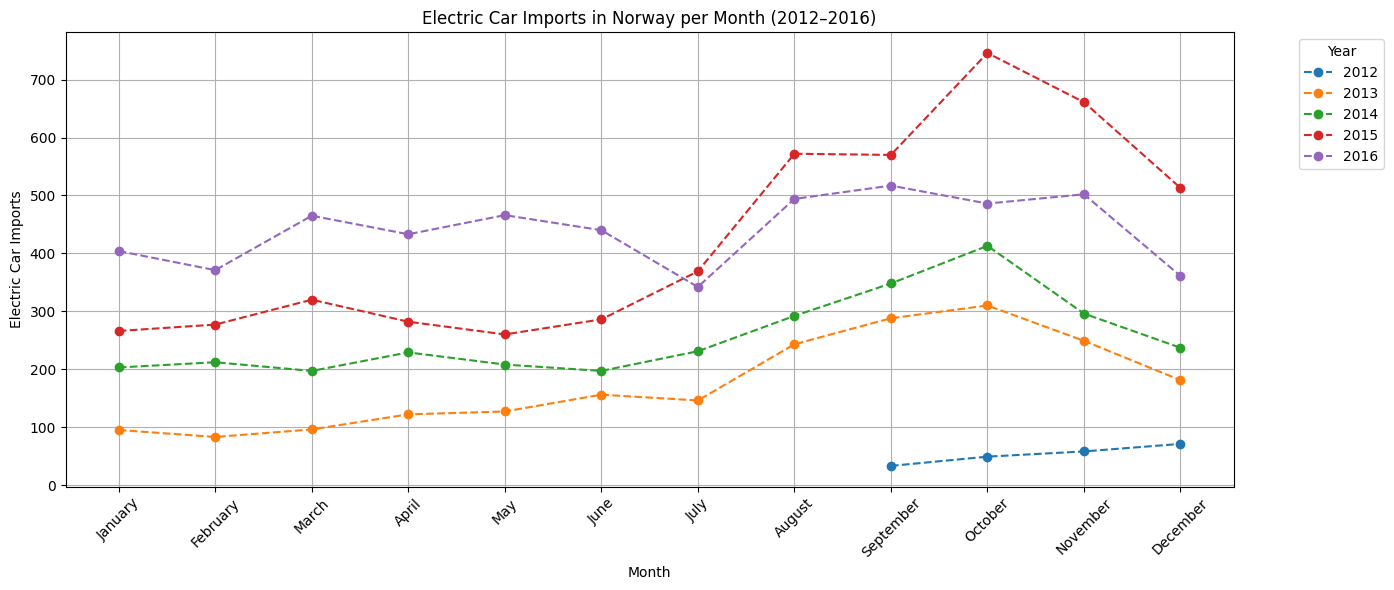

In [ ]:
import matplotlib.pyplot as plt
import calendar


pivot_df_car_import = pivot_df_car_import.drop(columns=2017)


pivot_df_car_import.index = pivot_df_car_import.index.map(lambda m: calendar.month_name[m])


month_order = list(calendar.month_name)[1:]  
pivot_df_car_import = pivot_df_car_import.reindex(month_order)

# Plot
plt.figure(figsize=(14, 6))
for year in pivot_df_car_import.columns:
    plt.plot(pivot_df_car_import.index,
             pivot_df_car_import[year],
             marker='o',
             linestyle='--',
             label=str(year))

plt.xlabel("Month")
plt.ylabel("Electric Car Imports")
plt.title("Electric Car Imports in Norway per Month (2012–2016)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



g) Draw a line chart of average diesel share per year

In [190]:
df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [191]:
df_diesel = duckdb.query("""--sql
    SELECT 
    Year, 
    AVG(Diesel_Share) as Diesel_Share
    FROM df
    GROUP BY
        Year
    ORDER BY
        YEAR
    ASC   
""").df()
df_diesel

,Year,Diesel_Share
0,2007,74.216667
1,2008,72.300000
2,2009,72.241667
3,2010,74.875000
4,2011,75.550000
5,2012,64.391667
6,2013,52.933333
7,2014,48.783333
8,2015,40.991667
9,2016,31.691667


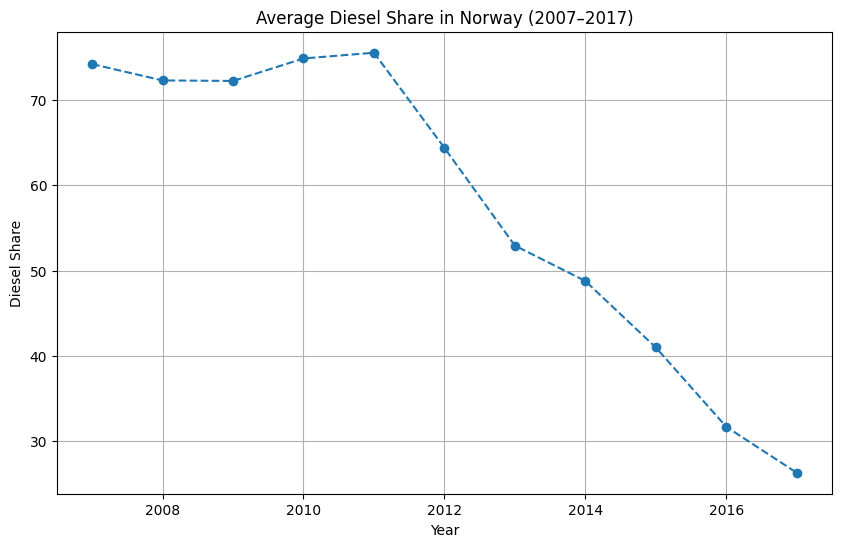

In [193]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_diesel["Year"], df_diesel["Diesel_Share"], marker='o', linestyle='--') # marker for dots, linestyle for spaces in line

# Labels and title
plt.xlabel("Year")
plt.ylabel("Diesel Share")
plt.title("Average Diesel Share in Norway (2007–2017)")
plt.grid(True)
plt.show()